In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of employees
n_employees = 10000

# Generate data
employee_id = np.arange(1, n_employees + 1)
age = np.random.randint(22, 60, n_employees)
gender = np.random.choice(['Male', 'Female'], n_employees)
marital_status = np.random.choice(['Single', 'Married', 'Divorced'], n_employees)
department = np.random.choice(['Sales', 'Engineering', 'HR', 'Finance', 'IT', 'Marketing'], n_employees)
job_level = np.random.randint(1, 6, n_employees)
salary = np.random.randint(30000, 120000, n_employees)
job_satisfaction = np.random.randint(1, 5, n_employees)
work_life_balance = np.random.randint(1, 5, n_employees)
hours_worked_per_week = np.random.randint(30, 60, n_employees)
years_at_company = np.random.randint(1, 15, n_employees)
promotions = np.random.randint(0, 4, n_employees)
overtime = np.random.choice(['Yes', 'No'], n_employees, p=[0.3, 0.7])
kpi_met = np.random.choice([1, 0], n_employees, p=[0.6, 0.4])
commute_time = np.random.randint(10, 120, n_employees)
education_level = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_employees, p=[0.3, 0.4, 0.2, 0.1])
recognition_program = np.random.choice(['Yes', 'No'], n_employees, p=[0.5, 0.5])
manager_support = np.random.randint(1, 5, n_employees)

# Churn (target variable)
# Simulating churn using factors that influence churn probability
churn = (
    (job_satisfaction < 3).astype(int) * np.random.randint(70, 100, n_employees) / 100 +
    (work_life_balance < 3).astype(int) * np.random.randint(50, 90, n_employees) / 100 +
    (years_at_company < 3).astype(int) * np.random.randint(60, 95, n_employees) / 100 +
    (overtime == 'Yes').astype(int) * np.random.randint(30, 80, n_employees) / 100 -
    (kpi_met == 1).astype(int) * np.random.randint(20, 60, n_employees) / 100 +
    (salary < 50000).astype(int) * np.random.randint(40, 80, n_employees) / 100
) > 0.6  # Threshold for churn probability

churn = churn.astype(int)

# Create DataFrame
data = pd.DataFrame({
    'EmployeeID': employee_id,
    'Age': age,
    'Gender': gender,
    'MaritalStatus': marital_status,
    'Department': department,
    'JobLevel': job_level,
    'Salary': salary,
    'JobSatisfaction': job_satisfaction,
    'WorkLifeBalance': work_life_balance,
    'HoursWorkedPerWeek': hours_worked_per_week,
    'YearsAtCompany': years_at_company,
    'Promotions': promotions,
    'Overtime': overtime,
    'KPIAchieved': kpi_met,
    'CommuteTime': commute_time,
    'EducationLevel': education_level,
    'RecognitionProgram': recognition_program,
    'ManagerSupport': manager_support,
    'Churn': churn
})

# Save to CSV
data.to_csv('employee_churn_dataset.csv', index=False)
print("Dataset saved as 'employee_churn_dataset.csv'")

# Display dataset
print(data.head())

Dataset saved as 'employee_churn_dataset.csv'
   EmployeeID  Age  Gender MaritalStatus Department  JobLevel  Salary  \
0           1   50    Male      Divorced  Marketing         4   89567   
1           2   36  Female      Divorced  Marketing         4   43421   
2           3   29    Male       Married    Finance         4   78938   
3           4   42  Female        Single         IT         1   40974   
4           5   40  Female       Married    Finance         4   32500   

   JobSatisfaction  WorkLifeBalance  HoursWorkedPerWeek  YearsAtCompany  \
0                3                2                  55               1   
1                2                1                  51              11   
2                1                1                  56               5   
3                1                1                  33              12   
4                1                4                  48               8   

   Promotions Overtime  KPIAchieved  CommuteTime EducationLevel 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('employee_churn_dataset.csv')

# Prepare features (X) and target (y)
X = data.drop(columns=['EmployeeID', 'Churn'])  # Drop unnecessary columns
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
probabilities = rf.predict_proba(X_test)[:, 1]  # Probability of churn
predictions = rf.predict(X_test)  # Predicted churn/retain

# Add probabilities and predictions to the test set for analysis
results = X_test.copy()
results['ChurnProbability'] = probabilities
results['Prediction'] = predictions
results['Prediction'] = results['Prediction'].apply(lambda x: 'Churn' if x == 1 else 'Retain')

# Save results to a CSV
results.to_csv('employee_churn_predictions.csv', index=False)
print("Predictions saved as 'employee_churn_predictions.csv'")

# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, predictions))

# Display sample results
print(results.head())

Predictions saved as 'employee_churn_predictions.csv'
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1016
           1       0.96      0.96      0.96      1984

    accuracy                           0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000

      Age  JobLevel  Salary  JobSatisfaction  WorkLifeBalance  \
6252   50         1   70176                2                1   
4684   57         5   38651                2                2   
1731   32         3   36033                4                3   
4742   25         2   81879                1                1   
4521   47         1   86791                1                4   

      HoursWorkedPerWeek  YearsAtCompany  Promotions  KPIAchieved  \
6252                  39              10           0            0   
4684                  52              10           0            1 

Predictions saved as 'employee_churn_predictions.csv'
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1016
           1       0.96      0.96      0.96      1984

    accuracy                           0.95      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



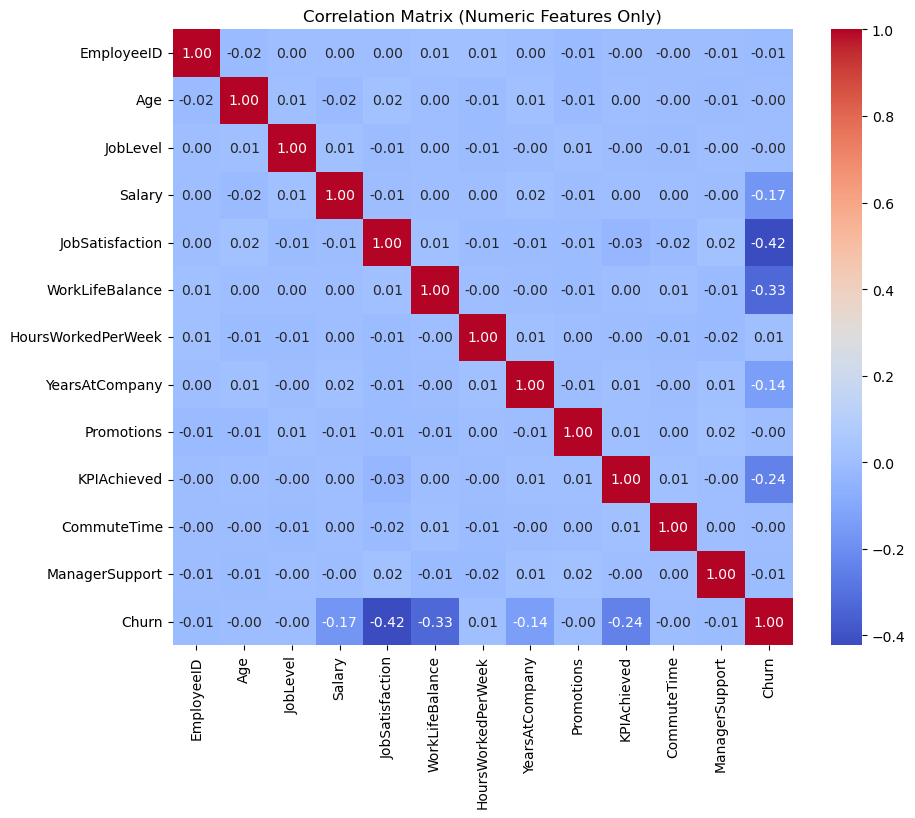

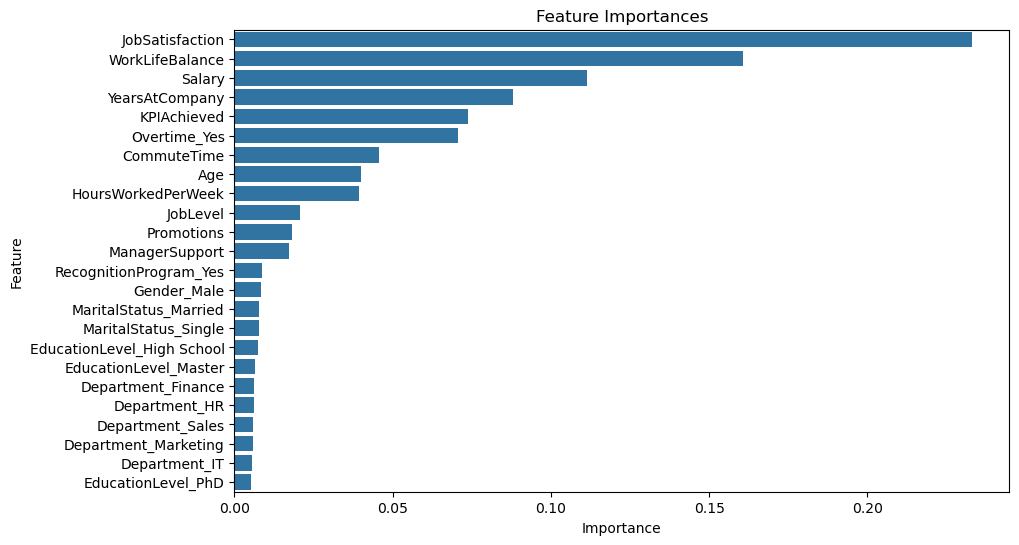

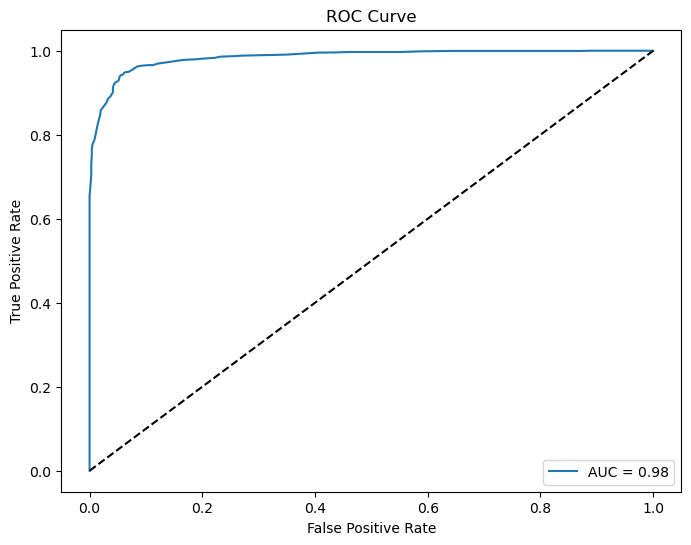

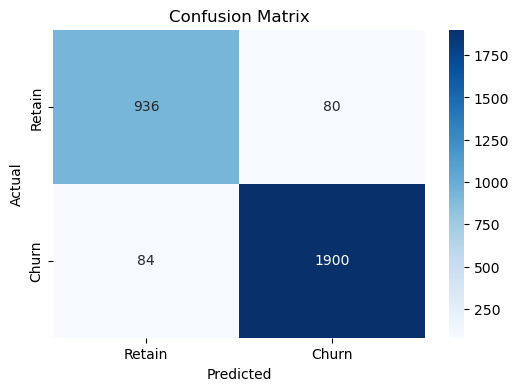

Descriptive Statistics for Numerical Features:

        EmployeeID           Age      JobLevel         Salary  \
count  10000.00000  10000.000000  10000.000000   10000.000000   
mean    5000.50000     40.561200      2.996100   74878.788200   
std     2886.89568     10.876483      1.406657   25871.032054   
min        1.00000     22.000000      1.000000   30002.000000   
25%     2500.75000     31.000000      2.000000   52620.000000   
50%     5000.50000     41.000000      3.000000   75200.500000   
75%     7500.25000     50.000000      4.000000   97015.750000   
max    10000.00000     59.000000      5.000000  119988.000000   

       JobSatisfaction  WorkLifeBalance  HoursWorkedPerWeek  YearsAtCompany  \
count     10000.000000     10000.000000         10000.00000    10000.000000   
mean          2.491200         2.494800            44.54450        7.578200   
std           1.120736         1.119687             8.63674        4.007579   
min           1.000000         1.000000           

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('employee_churn_dataset.csv')

# Prepare features (X) and target (y)
X = data.drop(columns=['EmployeeID', 'Churn'])  # Drop unnecessary columns
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
probabilities = rf.predict_proba(X_test)[:, 1]  # Probability of churn
predictions = rf.predict(X_test)  # Predicted churn/retain

# Add probabilities and predictions to the test set for analysis
results = X_test.copy()
results['ChurnProbability'] = probabilities
results['Prediction'] = predictions
results['Prediction'] = results['Prediction'].apply(lambda x: 'Churn' if x == 1 else 'Retain')

# Save results to a CSV
results.to_csv('employee_churn_predictions.csv', index=False)
print("Predictions saved as 'employee_churn_predictions.csv'")

# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, predictions))

# Correlation Matrix (Include only numeric columns)
numeric_columns = data.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_columns.corr()  # Compute correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retain', 'Churn'], yticklabels=['Retain', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Descriptive Statistics
print("Descriptive Statistics for Numerical Features:\n")
print(data.describe())

# Check for class imbalance
class_distribution = y.value_counts(normalize=True)
print("Class Distribution:\n")
print(class_distribution)


In [5]:
pwd

'C:\\Users\\npanousieris'